Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Data Collection & Analysis

In [3]:
#Chạy bộ dữ liệu
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
#in 5 hàng đầu tiên của bộ dữ liệu để kiểm tra
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# xác định số lượng hàng và cột (Khi chưa xử lý)
customer_data.shape

(200, 5)

In [6]:
# lấy thông tin từ bộ dữ liệu có sẵn (chưa xử lý)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# kiểm tra dữ liệu bị thiếu
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#Xử lý dữ liệu
customer_data.dropna(axis=0,inplace=True)

In [9]:
# lấy thông tin từ bộ dữ liệu có sẵn (Đã xử lý)
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# kiểm tra dữ liệu bị thiếu
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
data_1=customer_data[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

In [12]:
#Count: Số lượng quan sát trong tập dữ liệu
#Mean (Trung bình): Giá trị trung bình của tất cả các giá trị trong tập dữ liệu
#Std (Độ lệch chuẩn): Đo lường mức độ phân tán của các giá trị trong tập dữ liệu
#Min (Giá trị nhỏ nhất): Giá trị nhỏ nhất trong tập dữ liệu
#Q1,2,3: Tứ phân vị đầu tiên, giá trị giữa, và tứ phân vị thứ 3 là các giá trị mà tại đó, bộ dữ liệu chia thành các phần bằng nhau
data_1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


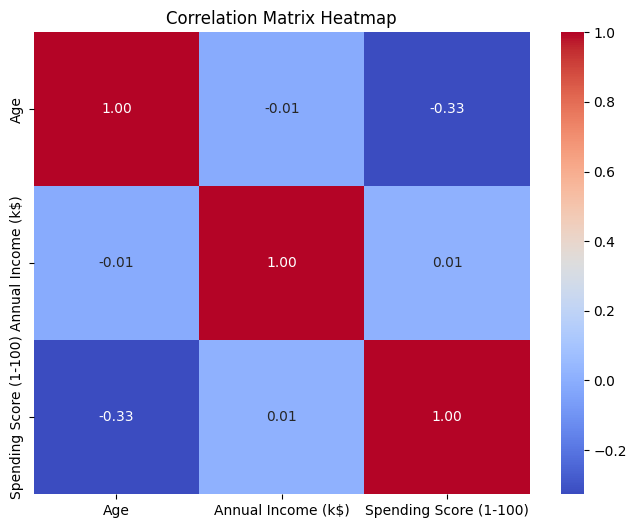

In [13]:
#Tính ma trận tương quan giữa các cột trong data_1
data_1.corr()
#Optional_Vẽ biểu đồ tương quan để hiển thị kết quả ma trận tương quan đã tính
# Tính ma trận tương quan
correlation_matrix = data_1.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

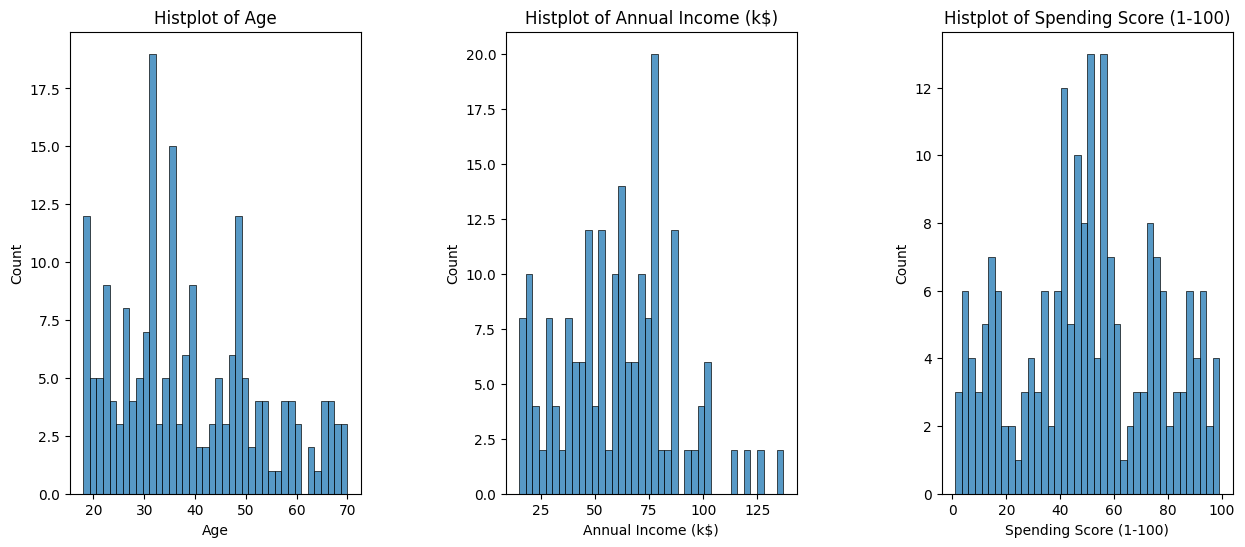

In [14]:
#Vẽ ba biểu đồ histogram cho các biến 'Age', 'Annual Income (k$)', và 'Spending Score (1-100)'
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =5, wspace = 0.5)
    sns.histplot(customer_data[x] , bins = 40)
    plt.title('Histplot of {}'.format(x))
plt.show()

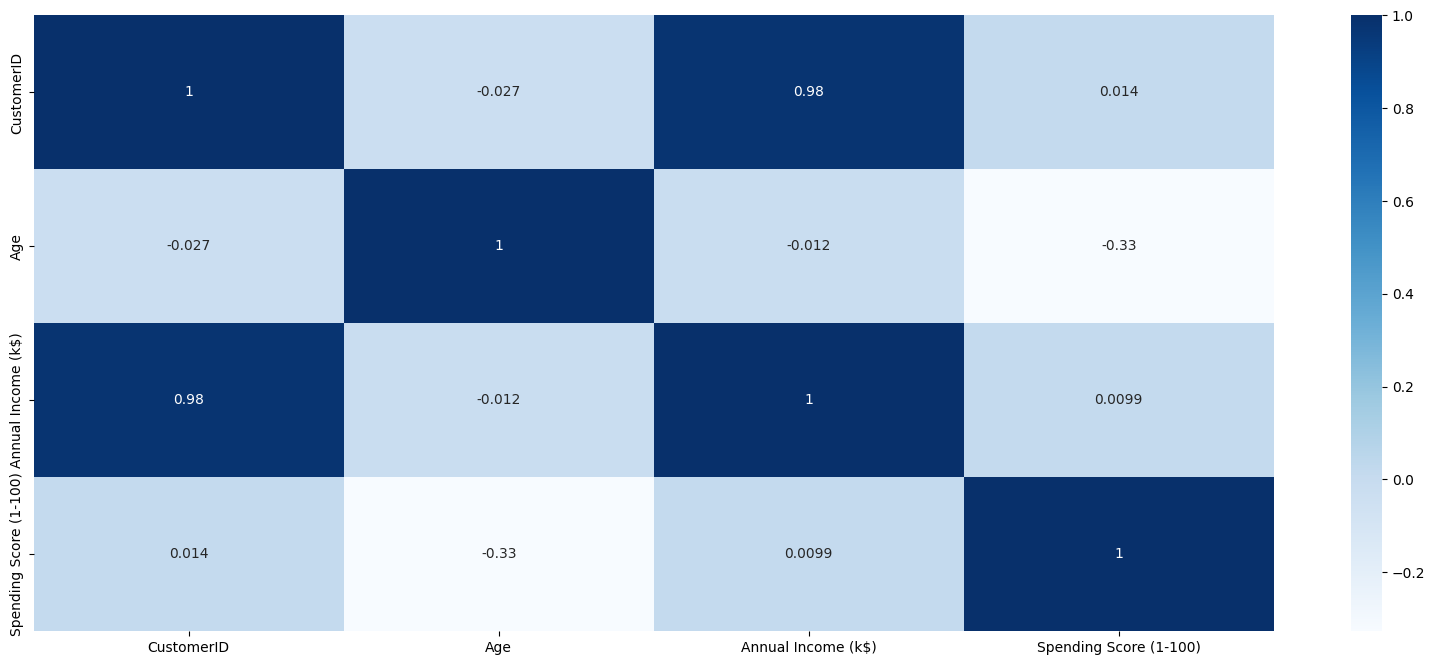

In [15]:
# Tạo biểu đồ thể hiện mức độ tương quan giữa các thuộc tính
plt.figure(figsize = (20,8))
sns.heatmap(customer_data.corr(numeric_only = True), annot = True, cmap = plt.cm.Blues)
plt.show()

In [16]:
# Nhận và biến đổi giá trị 2 cột có chỉ số 3 và 4 (là cột 4: Annual Income và 5: Spending Score) trong dataframe và lưu vào ma trận X
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [17]:
# Tìm mật độ đo hợp lý trong phân cụm dữ liệu từ số lượng cụm khác nhau
# Within-Cluster-Sum-of-Squares" (WCSS) là tổng bình phương khoảng cách giữa mỗi điểm dữ liệu và centroid của cụm mà nó thuộc về.
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

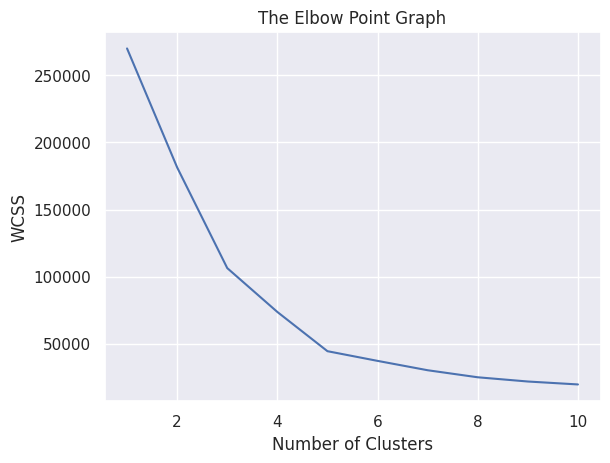

In [18]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
# trả về nhãn cho mỗi điểm dữ liệu dựa trên các cụm
Y = kmeans.fit_predict(X)
#print(customer_data['CustomerID'] ,Y)
print(customer_data[:] ,Y)
customer_data['Cluster_Label'] = Y
customer_data.to_csv('/content/customer_data_with_clusters.csv', index=False)



     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns] [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 

In [68]:
# Hiển thị DataFrame
print(customer_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_Label  
0              4  
1              3  
2              4  
3              3  
4              4  


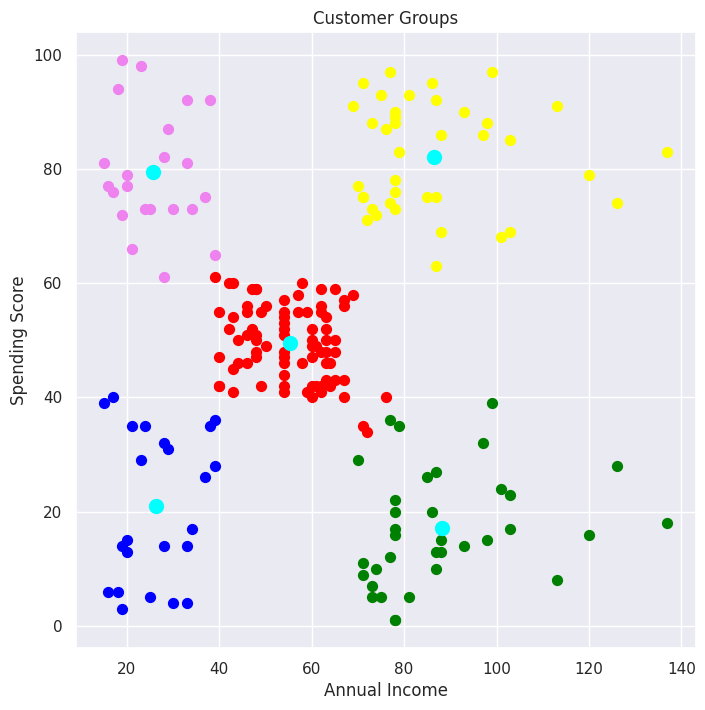

In [ ]:
# plotting all the clusters and their Centroids
# Phác họa tất cả các cụm và các điểm dữ liệu được sử dụng để đại diện cho các cụm trong phân cụm (Centroids).

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')




# plot the centroids
# Phác họa các điểm
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()